# Bank Customers Churn Dataset Using ANN

# Context
A dataset which contain some customers who are withdrawing their account from the bank due to some loss and other issues with the help this data we try to analyse and maintain accuracy.

# Importing libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset

In [40]:
df=pd.read_csv('C:\Sravya Thumati\My Projects Datasets\Churn Modeling.csv')

In [41]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
x=df.iloc[:,3:-1]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [43]:
y=df.iloc[:,-1]
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


# Convert Categorical variables to Dummy variables

We can encode Geography and Gender categorical variables

In [44]:
print("Before encoding")
print("_________________________________________________________________________________________________________")
print(x['Geography'].head())
print("After encoding, before dropping first column as it's vaue can be obtained based on the remaining columns")
print("_________________________________________________________________________________________________________")
print(pd.get_dummies(x['Geography']))
print("After encoding, after dropping first column as it's vaue can be obtained based on the remaining columns")
print("_________________________________________________________________________________________________________")
geo=pd.get_dummies(x['Geography'],drop_first=True)
print(geo)

Before encoding
_________________________________________________________________________________________________________
0    France
1     Spain
2    France
3    France
4     Spain
Name: Geography, dtype: object
After encoding, before dropping first column as it's vaue can be obtained based on the remaining columns
_________________________________________________________________________________________________________
      France  Germany  Spain
0          1        0      0
1          0        0      1
2          1        0      0
3          1        0      0
4          0        0      1
...      ...      ...    ...
9995       1        0      0
9996       1        0      0
9997       1        0      0
9998       0        1      0
9999       1        0      0

[10000 rows x 3 columns]
After encoding, after dropping first column as it's vaue can be obtained based on the remaining columns
__________________________________________________________________________________________________

In [45]:
print("Before encoding")
print("_________________________________________________________________________________________________________")
print(x['Gender'].head())
print("After encoding, before dropping first column as it's vaue can be obtained based on the remaining columns")
print("_________________________________________________________________________________________________________")
print(pd.get_dummies(x['Gender']))
print("After encoding, after dropping first column as it's vaue can be obtained based on the remaining columns")
print("_________________________________________________________________________________________________________")
gen=pd.get_dummies(x['Gender'],drop_first=True)
print(gen)

Before encoding
_________________________________________________________________________________________________________
0    Female
1    Female
2    Female
3    Female
4    Female
Name: Gender, dtype: object
After encoding, before dropping first column as it's vaue can be obtained based on the remaining columns
_________________________________________________________________________________________________________
      Female  Male
0          1     0
1          1     0
2          1     0
3          1     0
4          1     0
...      ...   ...
9995       0     1
9996       0     1
9997       1     0
9998       0     1
9999       1     0

[10000 rows x 2 columns]
After encoding, after dropping first column as it's vaue can be obtained based on the remaining columns
_________________________________________________________________________________________________________
      Male
0        0
1        0
2        0
3        0
4        0
...    ...
9995     1
9996     1
9997     0
9998 

In [46]:
x=x.drop(['Geography','Gender'],axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [47]:
x=pd.concat([x,geo,gen],axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


# Splitting the data into train_test_split

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [49]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,1,0,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,1,0
3264,738,35,5,161274.05,2,1,0,181429.87,0,0,1
9845,590,38,9,0.00,2,1,1,148750.16,0,1,0


# Feature Scaling

Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1.

The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.

In sklearn.preprocessing.StandardScaler(), centering and scaling happens independently on each feature.

The magical formula which performs standardization: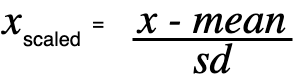


The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.

fit_transform()
fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. Here, the model built by us will learn the mean and variance of the features of the training set. These learned parameters are then used to scale our test data.

transform()
Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data. Thus, the parameters learned by our model using the training data will help us to transform our test data.

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [54]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

# Let's Build ANN!

# Importing keras libraries and packages

In [62]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

In [63]:
#initializing the model
classifier_model=Sequential()

In [64]:
#Adding input layer and the first hidden layer
classifier_model.add(Dense(activation="relu", input_dim=11,units=6,kernel_initializer="uniform"))

In [65]:
#Adding the second layer
classifier_model.add(Dense(activation="relu",units=6,kernel_initializer="uniform"))

In [66]:
#Adding the output layer
classifier_model.add(Dense(activation="sigmoid",units=1,kernel_initializer="uniform"))

The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output.Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.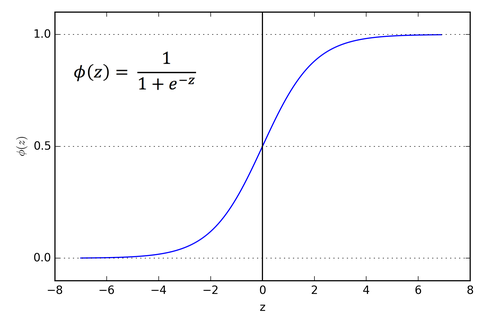

The ReLU is the most used activation function in the world right now.Since, it is used in almost all the convolutional neural networks or deep learning.


As you can see, the ReLU is half rectified (from bottom). f(z) is zero when z is less than zero and f(z) is equal to z when z is above or equal to zero.
Range: [ 0 to infinity)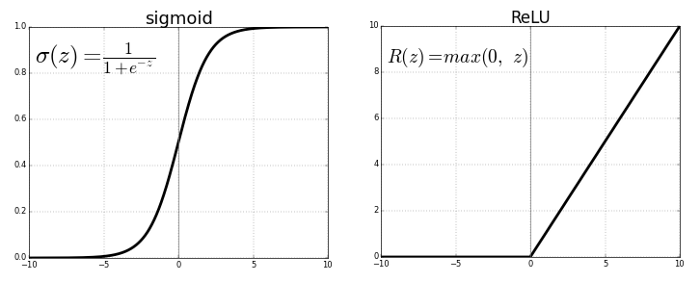Fig: ReLU v/s Logistic Sigmoid
The function and its derivative both are monotonic.
But the issue is that all the negative values become zero immediately which decreases the ability of the model to fit or train from the data properly. That means any negative input given to the ReLU activation function turns the value into zero immediately in the graph, which in turns affects the resulting graph by not mapping the negative values appropriately.

Kerner Initializer uniform means the weights are initialized between 0 to 1.

In [67]:
classifier_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


# Compiling the ANN

In [68]:
#binary_crossentropy used as we have 2 outputs either 0 or 1.
classifier_model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
#Fitting the ANN to the training data
classifier_model.fit(X_train, Y_train, batch_size=10,epochs=50)

Epoch 1/50
800/800 [==============================] - 3s 4ms/step - loss: 0.4784 - accuracy: 0.7971
Epoch 2/50
800/800 [==============================] - 3s 4ms/step - loss: 0.4192 - accuracy: 0.8231
Epoch 3/50
800/800 [==============================] - 3s 4ms/step - loss: 0.4130 - accuracy: 0.8275
Epoch 4/50
800/800 [==============================] - 3s 4ms/step - loss: 0.4092 - accuracy: 0.8300
Epoch 5/50
800/800 [==============================] - 3s 3ms/step - loss: 0.4073 - accuracy: 0.8328
Epoch 6/50
800/800 [==============================] - 3s 3ms/step - loss: 0.4056 - accuracy: 0.8334
Epoch 7/50
800/800 [==============================] - 3s 4ms/step - loss: 0.4038 - accuracy: 0.8330
Epoch 8/50
800/800 [==============================] - 3s 4ms/step - loss: 0.4033 - accuracy: 0.8334
Epoch 9/50
800/800 [==============================] - 3s 4ms/step - loss: 0.4021 - accuracy: 0.8341
Epoch 10/50
800/800 [==============================] - 3s 4ms/step - loss: 0.4011 - accuracy: 0.8346

In [72]:
#Making predictions on test data and evaluate the model
Y_pred=classifier_model.predict(X_test)
Y_pred=(Y_pred>0.5)

# Building confusion matrix and testing accuracy

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(Y_test,Y_pred)
accuracy=accuracy_score(Y_test,Y_pred)

In [74]:
print(cm)

[[1533   62]
 [ 214  191]]


In [75]:
print(accuracy)

0.862
